# Titanic Dataset

## Loading the Dataset 

In [68]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Basic Info 

In [51]:
#Overview

print(df.shape)
print(df.dtypes)
print(df.head())

(891, 15)
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False

In [52]:
#summary statistics

print(df.describe(include="object"))

         sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          644   549


## Bar Chart 

In [53]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
print(categorical_cols)


Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


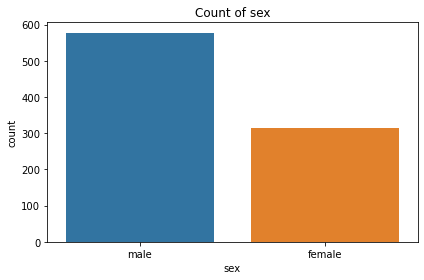

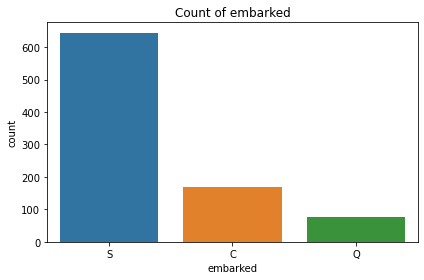

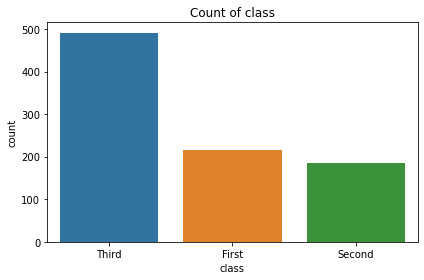

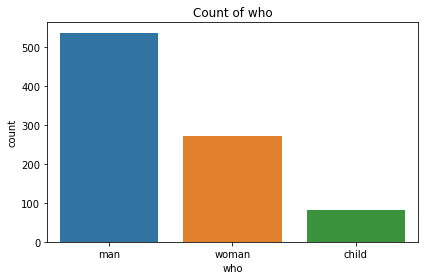

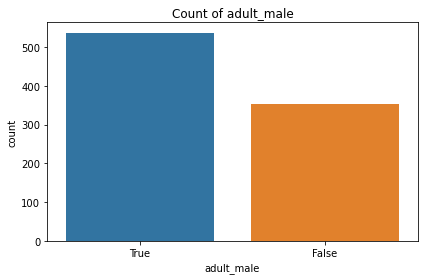

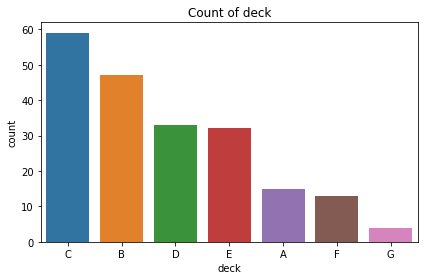

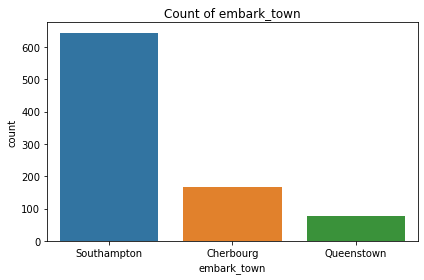

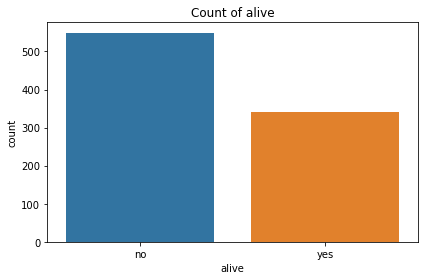

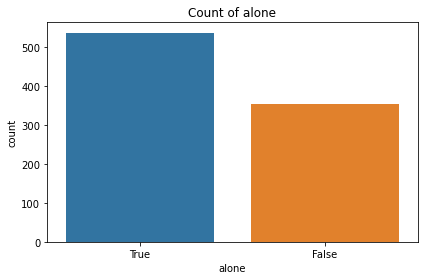

In [54]:
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Pie Chart 

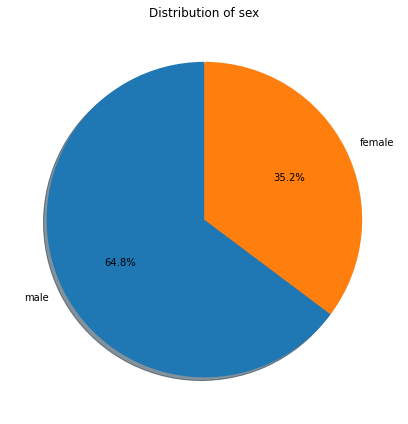

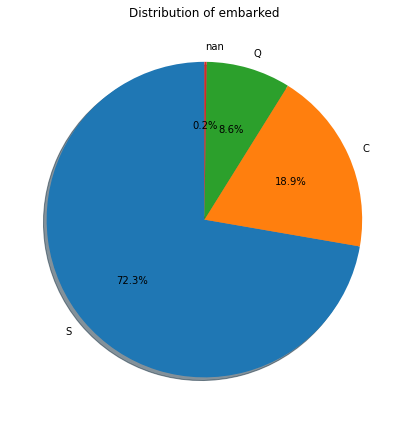

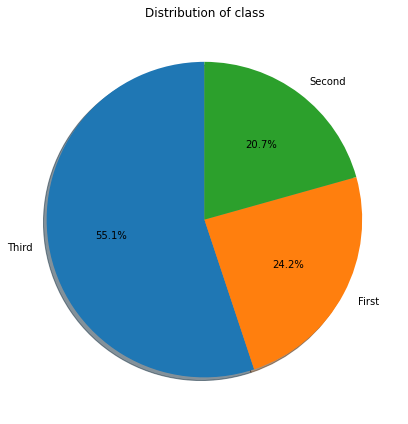

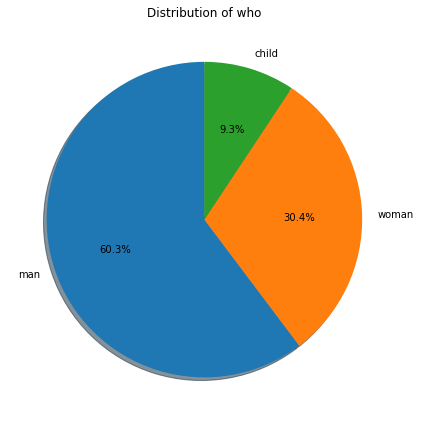

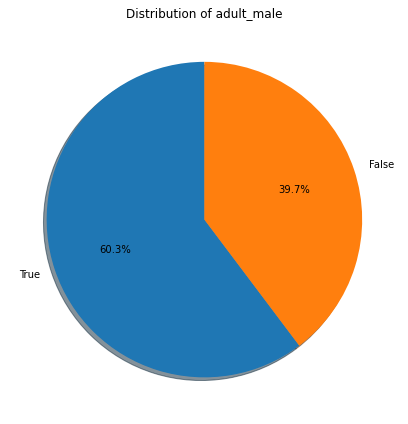

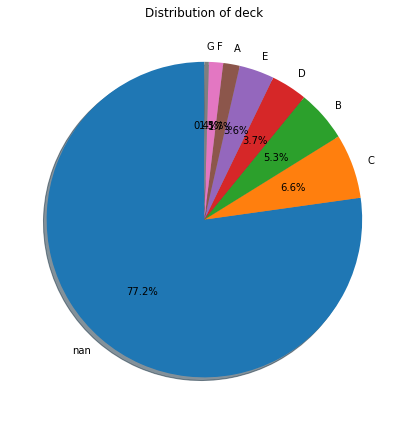

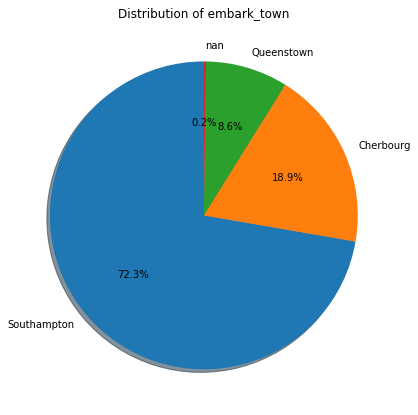

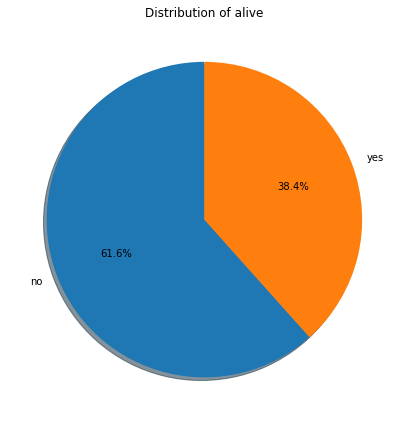

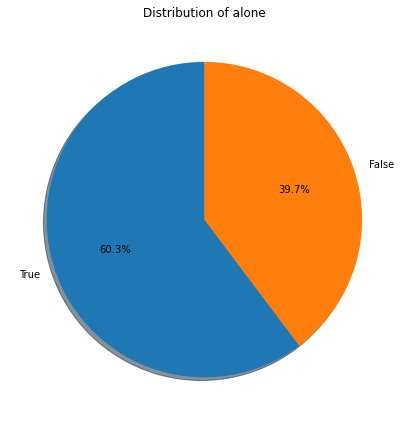

In [55]:
for col in categorical_cols:
    plt.figure(figsize=(5,5))
    df[col].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True, 
        figsize=(6, 6),
        label=''
    )
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Hides y-axis label
    plt.tight_layout()
    plt.show()

## Correlation Heatmap 

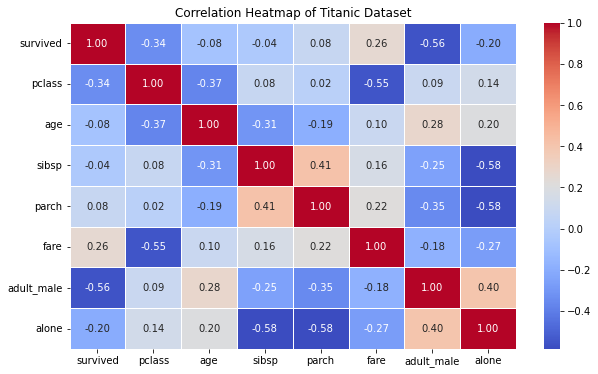

In [56]:
# Compute correlation matrix (numeric columns only)
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

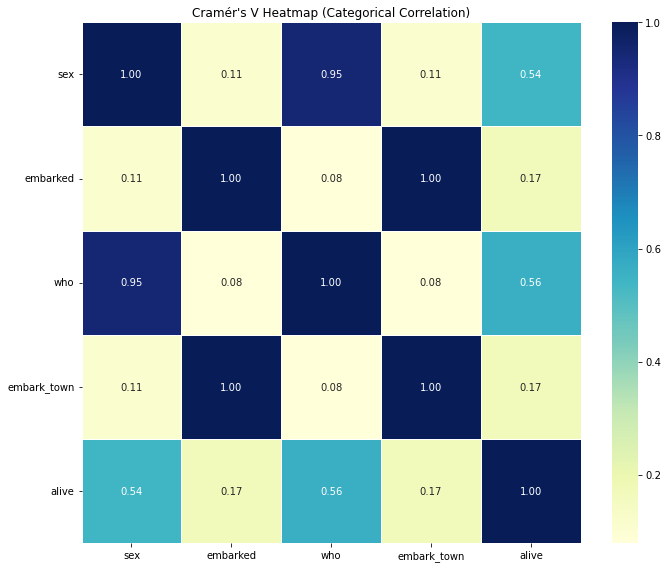

In [57]:
from scipy.stats import chi2_contingency

# Select only categorical columns
cat_cols = titanic.select_dtypes(include='object').columns.tolist()

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a matrix to store Cramér's V values
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Compute pairwise Cramér's V for each categorical variable pair
for col1 in cat_cols:
    for col2 in cat_cols:
        confusion_mat = pd.crosstab(titanic[col1], titanic[col2])
        cramers_results.loc[col1, col2] = cramers_v(confusion_mat)

# Convert to float
cramers_results = cramers_results.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title("Cramér's V Heatmap (Categorical Correlation)")
plt.xticks()
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Contingency Table 

In [58]:
from itertools import combinations
import scipy.stats as stats

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Select categorical columns (object, category, bool)
categorical_cols = titanic.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Create empty DataFrame for results
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Compute Cramér's V for each pair
for var1, var2 in combinations(categorical_cols, 2):
    table = pd.crosstab(titanic[var1], titanic[var2])
    v = cramers_v(table)
    cramers_v_matrix.loc[var1, var2] = round(v, 3)
    cramers_v_matrix.loc[var2, var1] = round(v, 3)

# Fill diagonal with 1.0 (self-correlation)
np.fill_diagonal(cramers_v_matrix.values, 1.0)

# Display the matrix
print("\nCramér's V Matrix (strength of association between categorical variables):")
print(cramers_v_matrix)


Cramér's V Matrix (strength of association between categorical variables):
               sex embarked  class    who adult_male   deck embark_town  \
sex            1.0    0.123  0.138  0.948      0.909  0.293       0.123   
embarked     0.123      1.0  0.264  0.092      0.112  0.227         1.0   
class        0.138    0.264    1.0  0.145      0.107  0.646       0.264   
who          0.948    0.092  0.145    1.0        1.0  0.321       0.092   
adult_male   0.909    0.112  0.107    1.0        1.0   0.27       0.112   
deck         0.293    0.227  0.646  0.321       0.27    1.0       0.227   
embark_town  0.123      1.0  0.264  0.092      0.112  0.227         1.0   
alive        0.543    0.173   0.34  0.564      0.557  0.203       0.173   
alone        0.304     0.12  0.136  0.453      0.405   0.26        0.12   

             alive  alone  
sex          0.543  0.304  
embarked     0.173   0.12  
class         0.34  0.136  
who          0.564  0.453  
adult_male   0.557  0.405  
deck 

## Boxplot for Categorical and Numeric Data 

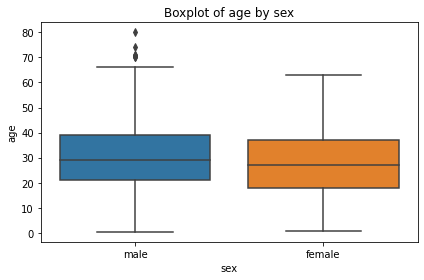

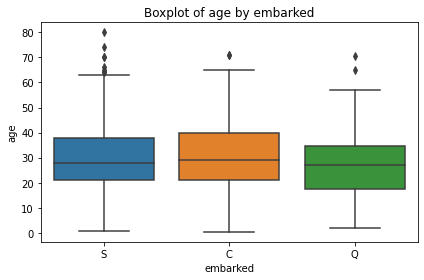

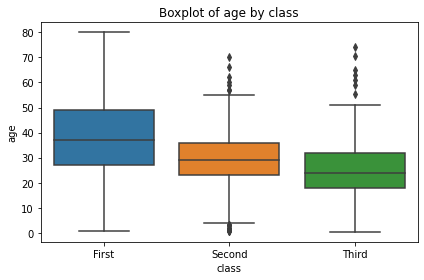

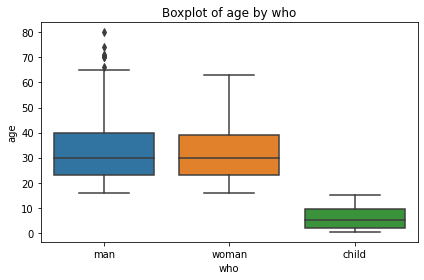

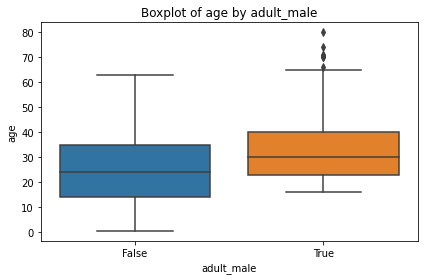

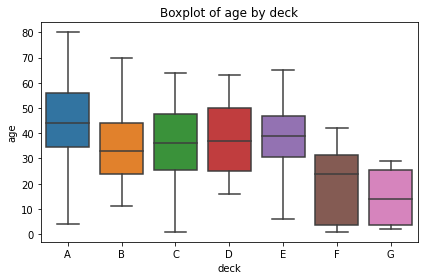

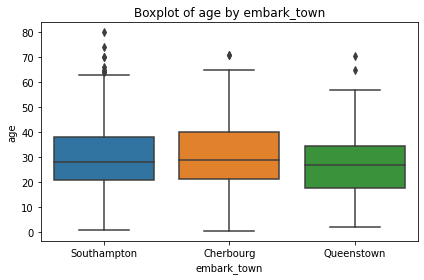

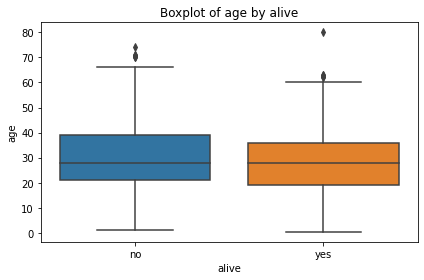

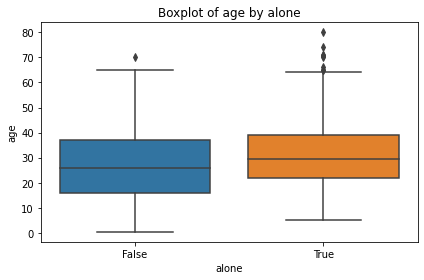

In [61]:
# Select categorical and numerical columns
categorical_cols = titanic.select_dtypes(include=["object", "category", "bool"]).columns
numerical_var = "age"  # You can also use 'fare' instead

# Create boxplots for each categorical variable vs 'age'
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y=numerical_var, data=titanic)
    plt.title(f"Boxplot of {numerical_var} by {col}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Violin Plot for Categorical and Numeric Data 

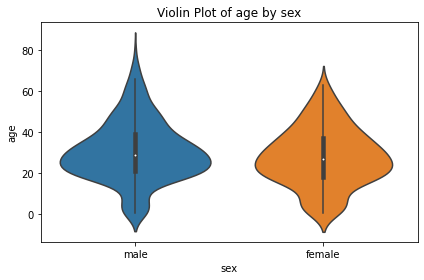

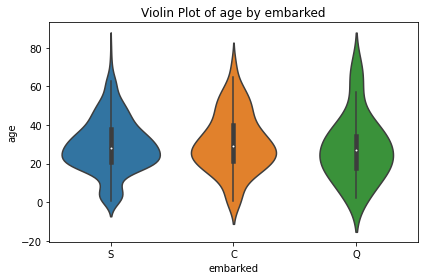

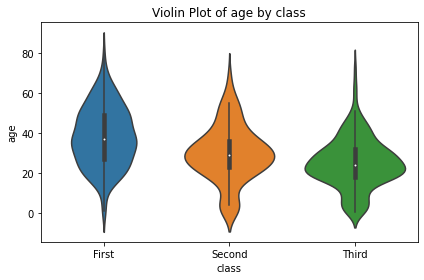

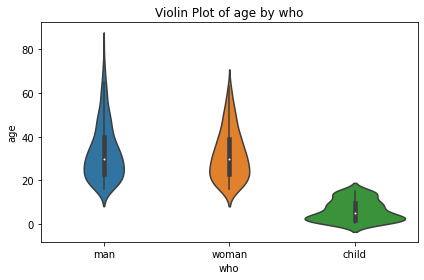

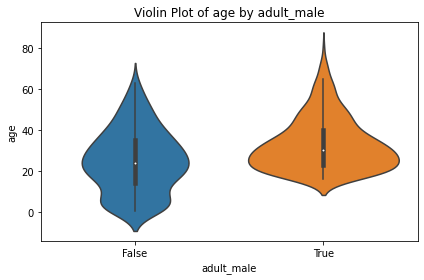

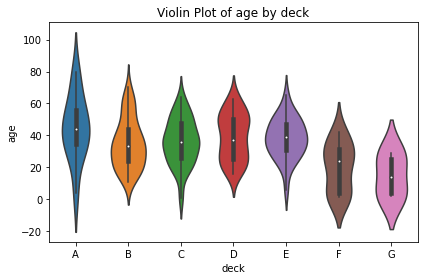

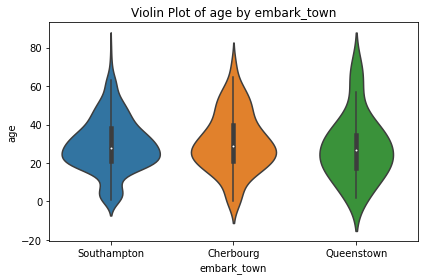

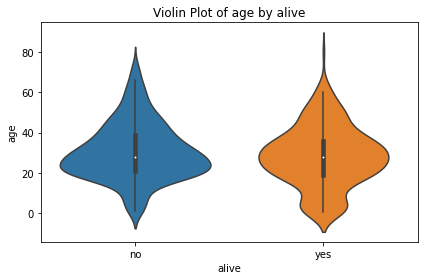

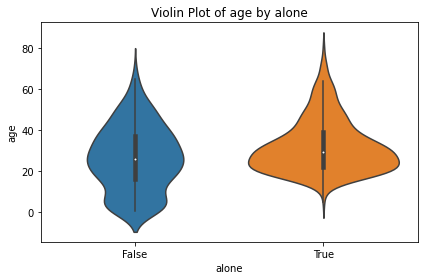

In [63]:
# Select categorical columns and a numerical variable
categorical_cols = titanic.select_dtypes(include=["object", "category", "bool"]).columns
numerical_var = "age"  # You can also change this to "fare"

# Create violin plots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=col, y=numerical_var, data=titanic, inner='box')
    plt.title(f"Violin Plot of {numerical_var} by {col}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Scatterplot for more than two variables 

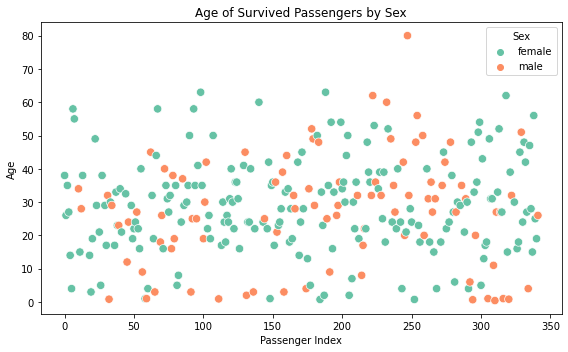

In [67]:
# Filter only survived passengers
survivors = titanic[titanic['survived'] == 1].reset_index(drop=True)
survivors['index'] = survivors.index  # create index for x-axis

# Scatter plot of age by sex
plt.figure(figsize=(8, 5))
sns.scatterplot(x='index', y='age', hue='sex', data=survivors, palette='Set2', s=70)

# Labels and title
plt.title('Age of Survived Passengers by Sex')
plt.xlabel('Passenger Index')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()